# Plausibility of Results: Preliminary minitest as a whole
## Umplausible! :-(~

In [9]:
import pandas as pd
import numpy as np

# Step 1: Read and Prepare the Data

# Load the probabilities
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')

# Load the preliminary test results
pm_df = pd.read_csv('PreliminaryResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))

# Step 2: Extract Data for All 8 Questions

questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Extract probabilities and observed responses for all questions
probs = data[[f'{q}_prob' for q in questions]].values
obs_pm = data[[f'{q}_pm' for q in questions]].values.astype(int)

# Step 3: Perform Simulation for All Questions

n_simulations = 10000  # Number of simulations
n_students = len(data)

# Simulate total correct responses
sim_totals_pm = []
for _ in range(n_simulations):
    sim_responses_pm = np.random.binomial(1, probs)
    sim_total_pm = sim_responses_pm.sum()
    sim_totals_pm.append(sim_total_pm)

sim_totals_pm = np.array(sim_totals_pm)

# Observed total correct responses
obs_total_pm = obs_pm.sum()

# Expected total correct responses
expected_total = probs.sum()

# Step 4: Calculate P-Value

if obs_total_pm >= expected_total:
    p_value_pm = np.mean(sim_totals_pm >= obs_total_pm)
else:
    p_value_pm = np.mean(sim_totals_pm <= obs_total_pm)

# Step 5: Interpret Results

print("Results for Preliminary Minitest (All 8 Questions):")
print(f"Expected Total Correct Responses: {expected_total:.2f}")
print(f"Observed Total Correct Responses: {obs_total_pm}")
print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")


Results for Preliminary Minitest (All 8 Questions):
Expected Total Correct Responses: 145.35
Observed Total Correct Responses: 191
P-Value for Preliminary Test: 0.0000


## However...

When analysing by groups (6 non-critical and 2 critical), the preliminary results are plausible, but the final are not. 
This is what the following two snippet show.


# _______________________________________________________________




# Plausibility of Results: Critical Questions (combined solution)
## Statistical Analysis Justification

To assess whether the observed changes in students' responses were due to the robot's influence rather than chance, we performed a simulation-based analysis comparing the observed correct responses to the expected correct responses based on students' abilities estimated via Item Response Theory (IRT).

## Methodology

Simulation Approach: For each critical question (Q3 and Q7), we simulated 10,000 datasets where each student's response was generated as a Bernoulli trial with the probability of a correct response equal to their IRT-estimated probability for that question.
Combined Analysis: We summed the simulated correct responses for both critical questions to obtain a null distribution of total correct responses under the assumption of no external influence.
P-Value Calculation: The p-value was calculated as the proportion of simulated totals that were less than or equal to the observed total correct responses.
## Justification

Accounting for Individual Abilities: By using each student's specific probability of answering correctly, we accounted for individual differences in ability, ensuring a fair comparison between expected and observed performances.
Non-Parametric Nature: The simulation approach does not rely on normality assumptions and is suitable for small sample sizes and binary data.
Assessing Implausibility: A significantly low p-value indicates that the observed results are unlikely to have occurred by chance given the students' abilities, thus attributing the changes to the robot's influence.


In [5]:
import pandas as pd
import numpy as np

# Step 1: Read and Prepare the Data

# Load the probabilities
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')

# Load the preliminary test results
pm_df = pd.read_csv('PreliminaryResults_8q.csv')

# Load the final test results
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Step 2: Extract Data for Critical Questions Combined

# Critical questions are Q3 and Q7

# Extract probabilities for critical questions
probs_q3 = data['Q3_prob'].values
probs_q7 = data['Q7_prob'].values

# Combined probabilities are used for simulation (simulate responses separately and sum)
# Extract observed responses in preliminary and final tests
obs_pm_q3 = data['Q3_pm'].values.astype(int)
obs_pm_q7 = data['Q7_pm'].values.astype(int)
obs_fm_q3 = data['Q3'].values.astype(int)
obs_fm_q7 = data['Q7'].values.astype(int)

# Step 3: Perform Simulation for Combined Critical Questions

n_simulations = 10000  # Number of simulations
n_students = len(data)

# Simulate combined correct responses
sim_totals_pm = []
sim_totals_fm = []
for _ in range(n_simulations):
    # Simulate preliminary responses
    sim_responses_q3 = np.random.binomial(1, probs_q3)
    sim_responses_q7 = np.random.binomial(1, probs_q7)
    sim_total_pm = sim_responses_q3.sum() + sim_responses_q7.sum()
    sim_totals_pm.append(sim_total_pm)
    
    # Simulate final responses
    sim_responses_q3 = np.random.binomial(1, probs_q3)
    sim_responses_q7 = np.random.binomial(1, probs_q7)
    sim_total_fm = sim_responses_q3.sum() + sim_responses_q7.sum()
    sim_totals_fm.append(sim_total_fm)

# Convert lists to numpy arrays
sim_totals_pm = np.array(sim_totals_pm)
sim_totals_fm = np.array(sim_totals_fm)

# Observed total correct responses
obs_total_pm = obs_pm_q3.sum() + obs_pm_q7.sum()
obs_total_fm = obs_fm_q3.sum() + obs_fm_q7.sum()

# Step 4: Calculate P-Values

# Calculate p-values
p_value_pm = np.mean(sim_totals_pm <= obs_total_pm)
p_value_fm = np.mean(sim_totals_fm <= obs_total_fm)

# Expected total correct responses based on probabilities
expected_total = probs_q3.sum() + probs_q7.sum()

# Step 5: Interpret Results

print("Combined Results for Critical Questions Q3 and Q7:")
print(f"Expected Total Correct Responses: {expected_total:.2f}")
print(f"Observed Total Correct Responses (Preliminary): {obs_total_pm}")
print(f"Observed Total Correct Responses (Final): {obs_total_fm}")
print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")
print(f"P-Value for Final Test: {p_value_fm:.4f}")


Combined Results for Critical Questions Q3 and Q7:
Expected Total Correct Responses: 44.30
Observed Total Correct Responses (Preliminary): 45
Observed Total Correct Responses (Final): 11
P-Value for Preliminary Test: 0.6086
P-Value for Final Test: 0.0000


## Conclusion

The simulation-based method provides a robust statistical framework to demonstrate that the significant decrease in correct answers on critical questions after the robot's intervention is implausible under the null hypothesis of no influence. This supports the conclusion that the robot had a substantial impact on students' decision-making, leading them to change correct answers to incorrect ones.

# _______________________________________________________________




# Plausibility of Results: Non-Critical Questions (combined solution)

In [15]:
import pandas as pd
import numpy as np

# Step 1: Read and Prepare the Data

# Load the probabilities
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')

# Load the preliminary test results
pm_df = pd.read_csv('PreliminaryResults_8q.csv')

# Load the final test results
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Step 2: Extract Data for Non-Critical Questions

# Non-critical questions are Q1, Q2, Q4, Q5, Q6, Q8
non_critical_questions = ['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q8']

# Extract probabilities and observed responses for non-critical questions
probs = data[[f'{q}_prob' for q in non_critical_questions]].values.flatten()
obs_pm = data[[f'{q}_pm' for q in non_critical_questions]].values.flatten().astype(int)
obs_fm = data[[q for q in non_critical_questions]].values.flatten().astype(int)

# Step 3: Calculate Expected Totals, Standard Deviation, Confidence Interval, Z-Scores

# Expected total correct responses
expected_total = probs.sum()

# Variance and standard deviation
variances = probs * (1 - probs)
total_variance = variances.sum()
std_dev = np.sqrt(total_variance)

# 99% confidence interval (Z = 2.576)
Z = 2.576
ci_lower = expected_total - Z * std_dev
ci_upper = expected_total + Z * std_dev

# Observed total correct responses
obs_total_pm = obs_pm.sum()
obs_total_fm = obs_fm.sum()

# Calculate z-scores
z_score_pm = (obs_total_pm - expected_total) / std_dev
z_score_fm = (obs_total_fm - expected_total) / std_dev

# Step 4: Perform Simulation for P-Values

n_simulations = 10000

sim_totals = []
for _ in range(n_simulations):
    sim_responses = np.random.binomial(1, probs)
    sim_total = sim_responses.sum()
    sim_totals.append(sim_total)
sim_totals = np.array(sim_totals)

# P-value for preliminary minitest
if obs_total_pm >= expected_total:
    p_value_pm = np.mean(sim_totals >= obs_total_pm)
else:
    p_value_pm = np.mean(sim_totals <= obs_total_pm)

# P-value for final minitest
if obs_total_fm >= expected_total:
    p_value_fm = np.mean(sim_totals >= obs_total_fm)
else:
    p_value_fm = np.mean(sim_totals <= obs_total_fm)

# Step 5: Interpret Results

print("Results for Non-Critical Questions:")
print(f"Expected Total Correct Responses: {expected_total:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"99% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Observed Total Correct Responses (Preliminary): {obs_total_pm}")
print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")
print(f"Z-Score for Preliminary Test: {z_score_pm:.2f}")
print(f"Observed Total Correct Responses (Final): {obs_total_fm}")
print(f"P-Value for Final Test: {p_value_fm:.4f}")
print(f"Z-Score for Final Test: {z_score_fm:.2f}")


Results for Non-Critical Questions:
Expected Total Correct Responses: 101.05
Standard Deviation: 7.64
99% Confidence Interval: [81.38, 120.72]
Observed Total Correct Responses (Preliminary): 146
P-Value for Preliminary Test: 0.0000
Z-Score for Preliminary Test: 5.89
Observed Total Correct Responses (Final): 228
P-Value for Final Test: 0.0000
Z-Score for Final Test: 16.62


# Plausibility of Results: Critical Questions (combined solution)

In [5]:
import pandas as pd
import numpy as np

# Step 1: Read and Prepare the Data

# Load the probabilities
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')

# Load the preliminary test results
pm_df = pd.read_csv('PreliminaryResults_8q.csv')

# Load the final test results
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Step 2: Extract Data for Critical Questions Combined

# Critical questions are Q3 and Q7

# Extract probabilities for critical questions
probs_q3 = data['Q3_prob'].values
probs_q7 = data['Q7_prob'].values

# Extract observed responses in preliminary and final tests
obs_pm_q3 = data['Q3_pm'].values.astype(int)
obs_pm_q7 = data['Q7_pm'].values.astype(int)
obs_fm_q3 = data['Q3'].values.astype(int)
obs_fm_q7 = data['Q7'].values.astype(int)

# Step 3: Perform Simulation for Combined Critical Questions

n_simulations = 10000  # Number of simulations
n_students = len(data)

# Simulate combined correct responses
sim_totals_pm = []
sim_totals_fm = []
for _ in range(n_simulations):
    # Simulate preliminary responses
    sim_responses_q3 = np.random.binomial(1, probs_q3)
    sim_responses_q7 = np.random.binomial(1, probs_q7)
    sim_total_pm = sim_responses_q3.sum() + sim_responses_q7.sum()
    sim_totals_pm.append(sim_total_pm)
    
    # Simulate final responses
    sim_responses_q3 = np.random.binomial(1, probs_q3)
    sim_responses_q7 = np.random.binomial(1, probs_q7)
    sim_total_fm = sim_responses_q3.sum() + sim_responses_q7.sum()
    sim_totals_fm.append(sim_total_fm)

sim_totals_pm = np.array(sim_totals_pm)
sim_totals_fm = np.array(sim_totals_fm)

# Observed total correct responses
obs_total_pm = obs_pm_q3.sum() + obs_pm_q7.sum()
obs_total_fm = obs_fm_q3.sum() + obs_fm_q7.sum()

# Expected total correct responses based on probabilities
expected_total = probs_q3.sum() + probs_q7.sum()

# Step 4: Calculate P-Values (Adjusted for Consistency)

# Preliminary Test
if obs_total_pm >= expected_total:
    p_value_pm = np.mean(sim_totals_pm >= obs_total_pm)
else:
    p_value_pm = np.mean(sim_totals_pm <= obs_total_pm)

# Final Test
if obs_total_fm >= expected_total:
    p_value_fm = np.mean(sim_totals_fm >= obs_total_fm)
else:
    p_value_fm = np.mean(sim_totals_fm <= obs_total_fm)

# Step 5: Interpret Results

print("Combined Results for Critical Questions Q3 and Q7:")
print(f"Expected Total Correct Responses: {expected_total:.2f}")
print(f"Observed Total Correct Responses (Preliminary): {obs_total_pm}")
print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")
print(f"Observed Total Correct Responses (Final): {obs_total_fm}")
print(f"P-Value for Final Test: {p_value_fm:.4f}")





Combined Results for Critical Questions Q3 and Q7:
Expected Total Correct Responses: 44.30
Observed Total Correct Responses (Preliminary): 45
P-Value for Preliminary Test: 0.4903
Observed Total Correct Responses (Final): 11
P-Value for Final Test: 0.0000


# Analysis question by question

In [20]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('FullDataset_320.csv')

# Rename relevant columns for easier reference
df = df.rename(columns={
    "User": "SUBJECT",
    "Question": "QUESTION",
    "Correctness Probability (per Q) [0,1]": "CORRECTNESS_PROB",
    "Preliminary answer": "PRELIMINARY_ANSWER",
    "Final answer": "FINAL_ANSWER"
})

# Initialize an empty list to store results for each question
results_per_question = []

def analyze_question(df, questionNum):
    # Filter data for the current question
    question_data = df[df['QUESTION'] == questionNum]

    # Extract probabilities and observed responses for preliminary and final minitests
    probs = question_data['CORRECTNESS_PROB'].values
    obs_pm = question_data['PRELIMINARY_ANSWER'].astype(int).values
    obs_fm = question_data['FINAL_ANSWER'].astype(int).values
    n_students = len(probs)

    # Expected total correct responses
    expected_total = probs.sum()

    # Variance and standard deviation
    variances = probs * (1 - probs)
    total_variance = variances.sum()
    std_dev = np.sqrt(total_variance)

    # 99% confidence interval (Z = 2.576)
    Z = 2.576
    ci_lower = expected_total - Z * std_dev
    ci_upper = expected_total + Z * std_dev

    # Observed total correct responses
    obs_total_pm = obs_pm.sum()
    obs_total_fm = obs_fm.sum()

    # Simulation for p-value
    n_simulations = 10000
    sim_totals = []
    for _ in range(n_simulations):
        sim_responses = np.random.binomial(1, probs)
        sim_totals.append(sim_responses.sum())
    sim_totals = np.array(sim_totals)

    # P-value for preliminary minitest
    p_value_pm = np.mean(sim_totals >= obs_total_pm) if obs_total_pm >= expected_total else np.mean(sim_totals <= obs_total_pm)

    # P-value for final minitest
    p_value_fm = np.mean(sim_totals >= obs_total_fm) if obs_total_fm >= expected_total else np.mean(sim_totals <= obs_total_fm)

    # Calculate z-scores
    z_score_pm = (obs_total_pm - expected_total) / std_dev
    z_score_fm = (obs_total_fm - expected_total) / std_dev

    # Calculate change in implausibility metrics
    delta_z_score = abs(z_score_fm) - abs(z_score_pm)
    percentage_increase = ((abs(z_score_fm) - abs(z_score_pm)) / abs(z_score_pm)) * 100 if abs(z_score_pm) != 0 else None

    # Store data for visualization
    results = {
        'question': questionNum,
        'expected_total': expected_total,
        'std_dev': std_dev,
        'obs_total_pm': obs_total_pm,
        'obs_total_fm': obs_total_fm,
        'p_value_pm': p_value_pm,
        'p_value_fm': p_value_fm,
        'z_score_pm': z_score_pm,
        'z_score_fm': z_score_fm,
        'delta_z_score': delta_z_score,
        'percentage_increase': percentage_increase
    }

    return results

# Analyze each question
for q_num in range(1, 9):
    result = analyze_question(df, q_num)
    results_per_question.append(result)

# Convert results to a DataFrame for easier visualization
results_df = pd.DataFrame(results_per_question)

# Display the results
print(results_df)


   question  expected_total   std_dev  obs_total_pm  obs_total_fm  p_value_pm  \
0         1          16.741  3.117969            28            37      0.0005   
1         2          17.332  3.130433            25            38      0.0118   
2         3          21.331  3.143980            20             6      0.3995   
3         4          16.009  3.098578            17            39      0.4286   
4         5          18.480  3.150575            27            38      0.0063   
5         6          16.660  3.115608            25            37      0.0063   
6         7          22.973  3.120738            25             5      0.3232   
7         8          15.826  3.092592            24            39      0.0065   

   p_value_fm  z_score_pm  z_score_fm  delta_z_score  percentage_increase  
0         0.0    3.611005    6.497499       2.886495            79.936051  
1         0.0    2.449502    6.602282       4.152781           169.535733  
2         0.0   -0.423349   -4.876303     

Results for Question 1:
Expected Total Correct Responses: 16.74
Standard Deviation: 3.12
99% Confidence Interval: [8.71, 24.77]
Observed Total Correct Responses (Preliminary): 28
P-Value for Preliminary Test: 0.0002
Z-Score for Preliminary Test: 3.61
Observed Total Correct Responses (Final): 37
P-Value for Final Test: 0.0000
Z-Score for Final Test: 6.50
---
Results for Question 2:
Expected Total Correct Responses: 17.33
Standard Deviation: 3.13
99% Confidence Interval: [9.27, 25.40]
Observed Total Correct Responses (Preliminary): 25
P-Value for Preliminary Test: 0.0122
Z-Score for Preliminary Test: 2.45
Observed Total Correct Responses (Final): 38
P-Value for Final Test: 0.0000
Z-Score for Final Test: 6.60
---
Results for Question 3:
Expected Total Correct Responses: 21.33
Standard Deviation: 3.14
99% Confidence Interval: [13.23, 29.43]
Observed Total Correct Responses (Preliminary): 20
P-Value for Preliminary Test: 0.3990
Z-Score for Preliminary Test: -0.42
Observed Total Correct Resp

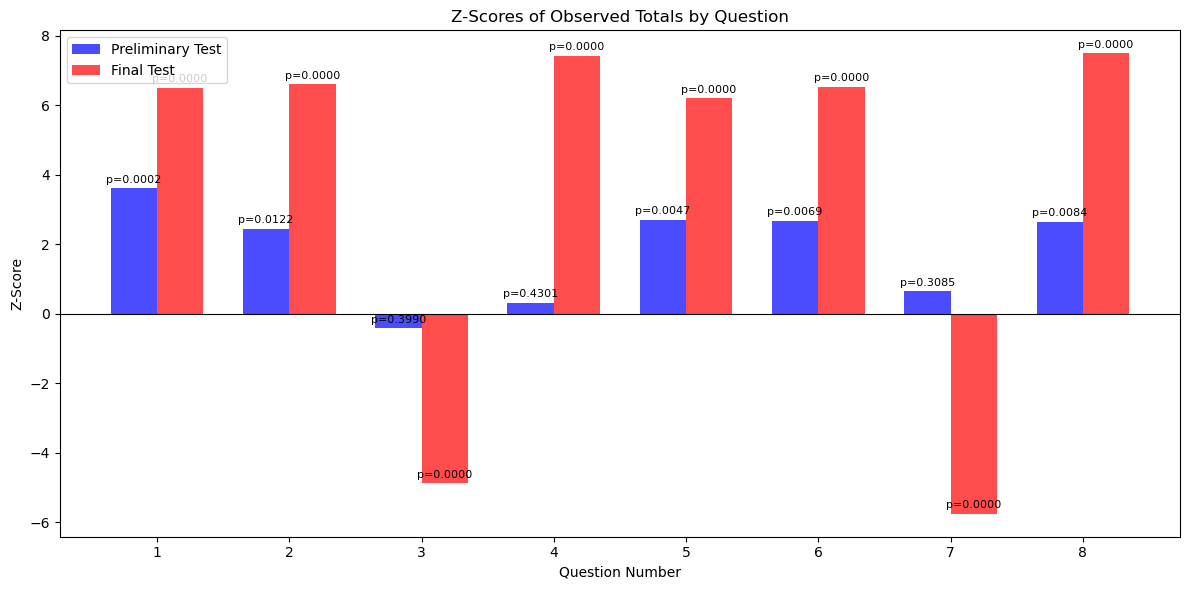

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Initialize lists to store z-scores
z_scores_pm = []
z_scores_fm = []

def analyze_question(questionNum):
    # Get question label
    question = f'Q{questionNum}'

    # Extract probabilities for the question
    probs = data[f'{question}_prob'].values

    # Extract observed responses for preliminary and final minitests
    obs_pm = data[f'{question}_pm'].values.astype(int)
    obs_fm = data[question].values.astype(int)
    n_students = len(probs)

    # Expected total correct responses
    expected_total = probs.sum()

    # Variance and standard deviation
    variances = probs * (1 - probs)
    total_variance = variances.sum()
    std_dev = np.sqrt(total_variance)

    # 99% confidence interval (Z = 2.576)
    Z = 2.576
    ci_lower = expected_total - Z * std_dev
    ci_upper = expected_total + Z * std_dev

    # Observed total correct responses
    obs_total_pm = obs_pm.sum()
    obs_total_fm = obs_fm.sum()

    # Simulation for p-value
    n_simulations = 10000
    sim_totals = []
    for _ in range(n_simulations):
        sim_responses = np.random.binomial(1, probs)
        sim_totals.append(sim_responses.sum())
    sim_totals = np.array(sim_totals)

    # P-value for preliminary minitest
    if obs_total_pm >= expected_total:
        p_value_pm = np.mean(sim_totals >= obs_total_pm)
    else:
        p_value_pm = np.mean(sim_totals <= obs_total_pm)

    # P-value for final minitest
    if obs_total_fm >= expected_total:
        p_value_fm = np.mean(sim_totals >= obs_total_fm)
    else:
        p_value_fm = np.mean(sim_totals <= obs_total_fm)

    # Calculate z-scores
    z_score_pm = (obs_total_pm - expected_total) / std_dev
    z_score_fm = (obs_total_fm - expected_total) / std_dev

    # Append z-scores for plotting
    z_scores_pm.append(z_score_pm)
    z_scores_fm.append(z_score_fm)

    # Output the results
    print(f"Results for Question {questionNum}:")
    print(f"Expected Total Correct Responses: {expected_total:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"99% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Observed Total Correct Responses (Preliminary): {obs_total_pm}")
    print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")
    print(f"Z-Score for Preliminary Test: {z_score_pm:.2f}")
    print(f"Observed Total Correct Responses (Final): {obs_total_fm}")
    print(f"P-Value for Final Test: {p_value_fm:.4f}")
    print(f"Z-Score for Final Test: {z_score_fm:.2f}")
    print("---")

    # Store data for visualization
    # Store data for visualization
    return {
        'question': questionNum,
        'expected_total': expected_total,
        'std_dev': std_dev,
        'obs_total_pm': obs_total_pm,
        'obs_total_fm': obs_total_fm,
        'sim_totals': sim_totals,
        'z_score_pm': z_score_pm,
        'z_score_fm': z_score_fm,
        'p_value_pm': p_value_pm,  # Include p-value for preliminary test
        'p_value_fm': p_value_fm   # Include p-value for final test
    }


# Collect data for all questions
all_data = []

for q_num in range(1, 9):
    result = analyze_question(q_num)
    all_data.append(result)

# Extract z-scores and question numbers
questions = [data['question'] for data in all_data]
z_scores_pm = [data['z_score_pm'] for data in all_data]
z_scores_fm = [data['z_score_fm'] for data in all_data]

# Plotting z-scores
bar_width = 0.35
index = np.arange(len(questions))

plt.figure(figsize=(12, 6))
plt.bar(index, z_scores_pm, bar_width, label='Preliminary Test', alpha=0.7, color='blue')
plt.bar(index + bar_width, z_scores_fm, bar_width, label='Final Test', alpha=0.7, color='red')

plt.xlabel('Question Number')
plt.ylabel('Z-Score')
plt.title('Z-Scores of Observed Totals by Question')
plt.xticks(index + bar_width / 2, questions)
plt.axhline(0, color='black', linewidth=0.8)

# Adding p-values as text on top of each bar
for i, (z_pm, z_fm, q_num) in enumerate(zip(z_scores_pm, z_scores_fm, questions)):
    p_value_pm = all_data[i]['p_value_pm']
    p_value_fm = all_data[i]['p_value_fm']
    plt.text(i, z_pm + 0.1, f'p={p_value_pm:.4f}', ha='center', va='bottom', fontsize=8, color='black')
    plt.text(i + bar_width, z_fm + 0.1, f'p={p_value_fm:.4f}', ha='center', va='bottom', fontsize=8, color='black')

plt.legend()
plt.tight_layout()
plt.show()


### Metric of plausibility (question by question)

Results for Question 1:
Expected Total Correct Responses: 16.74
Standard Deviation: 3.12
99% Confidence Interval: [8.71, 24.77]
Observed Total Correct Responses (Preliminary): 28
P-Value for Preliminary Test: 0.0004
Z-Score for Preliminary Test: 3.61
Observed Total Correct Responses (Final): 37
P-Value for Final Test: 0.0000
Z-Score for Final Test: 6.50
Delta Z-Score (abs): 2.89
Percentage Increase in Implausibility: 79.94%
---
Results for Question 2:
Expected Total Correct Responses: 17.33
Standard Deviation: 3.13
99% Confidence Interval: [9.27, 25.40]
Observed Total Correct Responses (Preliminary): 25
P-Value for Preliminary Test: 0.0093
Z-Score for Preliminary Test: 2.45
Observed Total Correct Responses (Final): 38
P-Value for Final Test: 0.0000
Z-Score for Final Test: 6.60
Delta Z-Score (abs): 4.15
Percentage Increase in Implausibility: 169.54%
---
Results for Question 3:
Expected Total Correct Responses: 21.33
Standard Deviation: 3.14
99% Confidence Interval: [13.23, 29.43]
Observ

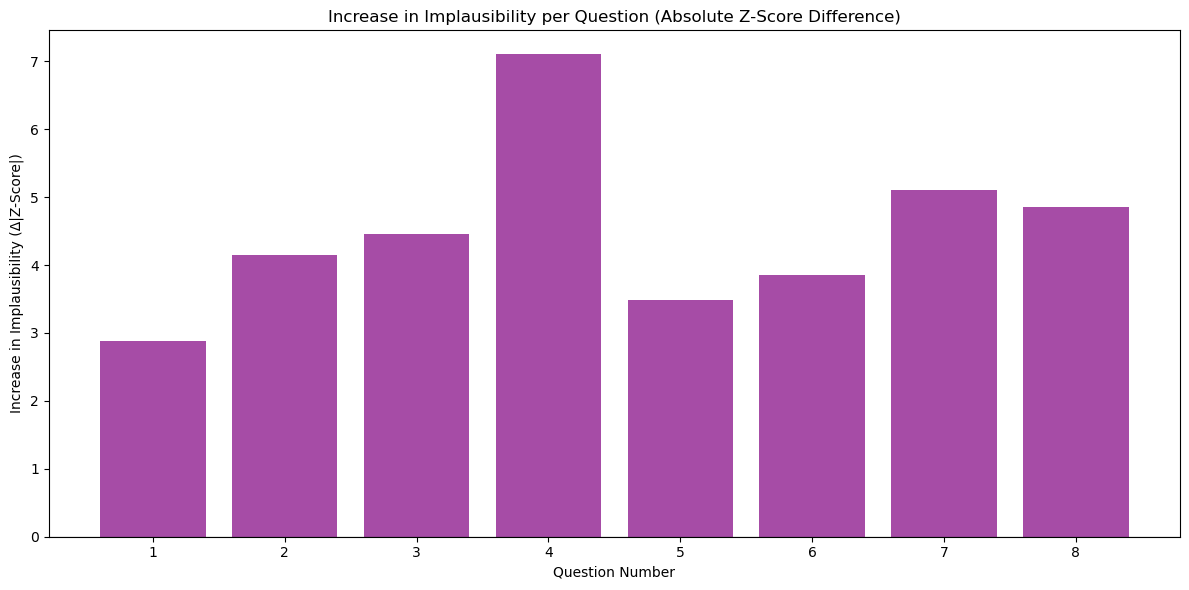

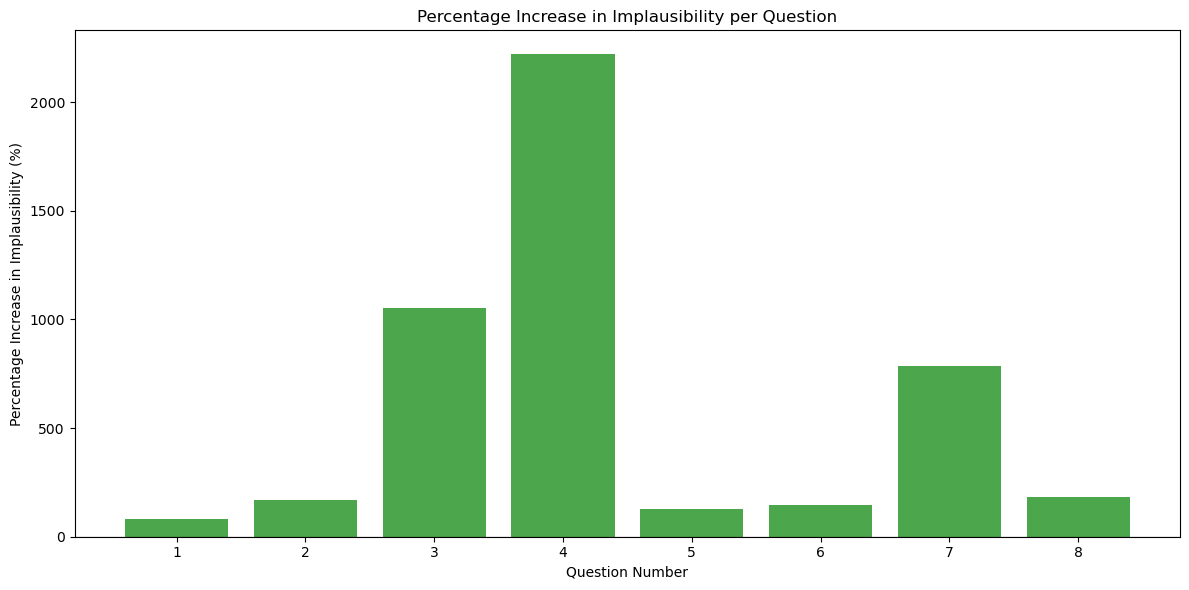

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

def analyze_question(questionNum):
    # Get question label
    question = f'Q{questionNum}'

    # Extract probabilities for the question
    probs = data[f'{question}_prob'].values

    # Extract observed responses for preliminary and final minitests
    obs_pm = data[f'{question}_pm'].values.astype(int)
    obs_fm = data[question].values.astype(int)
    n_students = len(probs)

    # Expected total correct responses
    expected_total = probs.sum()

    # Variance and standard deviation
    variances = probs * (1 - probs)
    total_variance = variances.sum()
    std_dev = np.sqrt(total_variance)

    # 99% confidence interval (Z = 2.576)
    Z = 2.576
    ci_lower = expected_total - Z * std_dev
    ci_upper = expected_total + Z * std_dev

    # Observed total correct responses
    obs_total_pm = obs_pm.sum()
    obs_total_fm = obs_fm.sum()

    # Simulation for p-value
    n_simulations = 10000
    sim_totals = []
    for _ in range(n_simulations):
        sim_responses = np.random.binomial(1, probs)
        sim_totals.append(sim_responses.sum())
    sim_totals = np.array(sim_totals)

    # P-value for preliminary minitest
    if obs_total_pm >= expected_total:
        p_value_pm = np.mean(sim_totals >= obs_total_pm)
    else:
        p_value_pm = np.mean(sim_totals <= obs_total_pm)

    # P-value for final minitest
    if obs_total_fm >= expected_total:
        p_value_fm = np.mean(sim_totals >= obs_total_fm)
    else:
        p_value_fm = np.mean(sim_totals <= obs_total_fm)

    # Calculate z-scores
    z_score_pm = (obs_total_pm - expected_total) / std_dev
    z_score_fm = (obs_total_fm - expected_total) / std_dev

    # **Calculate change in implausibility metrics**
    # Absolute difference in z-scores
    delta_z_score = abs(z_score_fm) - abs(z_score_pm)
    # Percentage increase in absolute z-scores
    if abs(z_score_pm) != 0:
        percentage_increase = ((abs(z_score_fm) - abs(z_score_pm)) / abs(z_score_pm)) * 100
    else:
        percentage_increase = None  # Undefined when z_score_pm is zero

    # Output the results
    print(f"Results for Question {questionNum}:")
    print(f"Expected Total Correct Responses: {expected_total:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"99% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
    print(f"Observed Total Correct Responses (Preliminary): {obs_total_pm}")
    print(f"P-Value for Preliminary Test: {p_value_pm:.4f}")
    print(f"Z-Score for Preliminary Test: {z_score_pm:.2f}")
    print(f"Observed Total Correct Responses (Final): {obs_total_fm}")
    print(f"P-Value for Final Test: {p_value_fm:.4f}")
    print(f"Z-Score for Final Test: {z_score_fm:.2f}")
    print(f"Delta Z-Score (abs): {delta_z_score:.2f}")
    if percentage_increase is not None:
        print(f"Percentage Increase in Implausibility: {percentage_increase:.2f}%")
    else:
        print("Percentage Increase in Implausibility: Undefined (division by zero)")
    print("---")

    # Store data for visualization
    return {
        'question': questionNum,
        'expected_total': expected_total,
        'std_dev': std_dev,
        'obs_total_pm': obs_total_pm,
        'obs_total_fm': obs_total_fm,
        'sim_totals': sim_totals,
        'z_score_pm': z_score_pm,
        'z_score_fm': z_score_fm,
        'p_value_pm': p_value_pm,
        'p_value_fm': p_value_fm,
        'delta_z_score': delta_z_score,
        'percentage_increase': percentage_increase
    }

# Collect data for all questions
all_data = []

for q_num in range(1, 9):
    result = analyze_question(q_num)
    all_data.append(result)

# Extract metrics for plotting
questions = [data['question'] for data in all_data]
z_scores_pm = [data['z_score_pm'] for data in all_data]
z_scores_fm = [data['z_score_fm'] for data in all_data]
delta_z_scores = [data['delta_z_score'] for data in all_data]
percentage_increases = [data['percentage_increase'] if data['percentage_increase'] is not None else 0 for data in all_data]

# Plot 1: Absolute Difference in Z-Scores
plt.figure(figsize=(12, 6))
plt.bar(questions, delta_z_scores, color='purple', alpha=0.7)
plt.xlabel('Question Number')
plt.ylabel('Increase in Implausibility (Δ|Z-Score|)')
plt.title('Increase in Implausibility per Question (Absolute Z-Score Difference)')
plt.xticks(questions)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# Plot 2: Percentage Increase in Implausibility
plt.figure(figsize=(12, 6))
plt.bar(questions, percentage_increases, color='green', alpha=0.7)
plt.xlabel('Question Number')
plt.ylabel('Percentage Increase in Implausibility (%)')
plt.title('Percentage Increase in Implausibility per Question')
plt.xticks(questions)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


### Interpreting the Graphs:
#### Plot 1 (Absolute Z-Score Difference):

Shows the change in implausibility per question.
Positive values indicate that the FM results are more implausible than the PM results.
Questions with the largest increases are those where the robot's influence had the most significant impact.

#### Plot 2 (Percentage Increase in Implausibility):

Highlights the proportional increase in implausibility.
Useful for identifying questions where even a small initial implausibility grew substantially.
Be cautious with questions where z_score_pm is zero, as the percentage increase is undefined (handled as zero in the code).

# Individual Performance Plausibility in both Preliminary and Final Minitest
Data Preparation: Reads data from CSV files and merges them into a single DataFrame.
Monte Carlo Simulation: Performs 10,000 simulations to compute expected values and confidence intervals.
Result Display: Outputs the results as a formatted table using print.
Visualization: Plots histograms to show the distribution of p-values for the Preliminary and Final Minitests.
By running this code in your environment, you'll be able to see the complete table and the visualizations as needed.

SUBJECT  Observed_Total_PM  Expected  95% CI Lower  95% CI Upper  Plausible_PM  P_Value_PM  Observed_Total_FM  Plausible_FM  P_Value_FM
     S1              0.624  0.478168         0.110      0.803000             1      0.1877              0.808             0      0.0245
     S2              0.680  0.435234         0.096      0.796000             1      0.1108              0.808             0      0.0166
     S3              0.711  0.440290         0.096      0.794000             1      0.0690              0.808             0      0.0163
     S4              0.715  0.435870         0.096      0.790000             1      0.0595              0.808             0      0.0139
     S7              0.471  0.436894         0.096      0.794000             1      0.4507              0.808             0      0.0157
     S8              0.330  0.418064         0.096      0.790000             1      0.6375              0.808             0      0.0122
     S9              0.903  0.479249         0.1

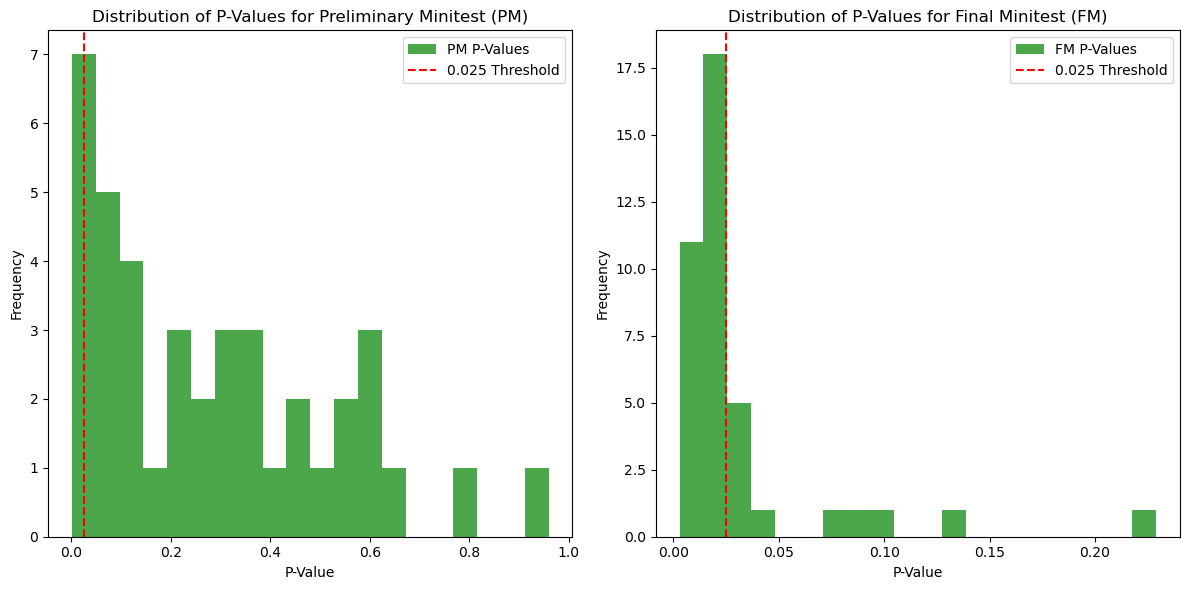

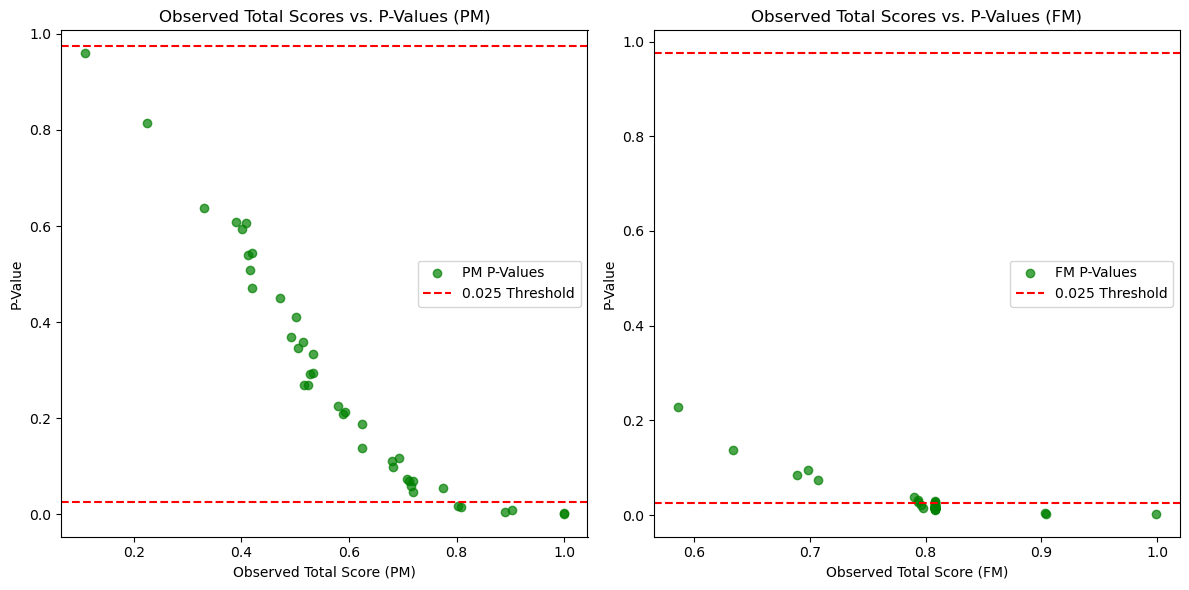

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Question values
question_values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Step 2: Monte Carlo Simulation for Each Student

n_simulations = 10000
results = []

for index, row in data.iterrows():
    subject_id = row['SUBJECT']
    
    # Extract probabilities for the simulation
    probs = row[['Q1_prob', 'Q2_prob', 'Q3_prob', 'Q4_prob', 'Q5_prob', 'Q6_prob', 'Q7_prob', 'Q8_prob']].values.astype(float)
    obs_pm = row[['Q1_pm', 'Q2_pm', 'Q3_pm', 'Q4_pm', 'Q5_pm', 'Q6_pm', 'Q7_pm', 'Q8_pm']].values.astype(int)
    obs_fm = row[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']].values.astype(int)

    # Calculate observed total performance scores for PM and FM
    observed_total_pm = np.dot(obs_pm, question_values)
    observed_total_fm = np.dot(obs_fm, question_values)

    # Simulate scores once for both PM and FM
    sim_totals = []
    for _ in range(n_simulations):
        # Simulate responses using the probabilities
        sim_responses = np.random.binomial(1, probs)
        sim_total = np.dot(sim_responses, question_values)
        sim_totals.append(sim_total)

    # Convert simulation results to a numpy array
    sim_totals = np.array(sim_totals)

    # Calculate the common expected values and confidence intervals
    expected_value = np.mean(sim_totals)
    lower_bound = np.percentile(sim_totals, 2.5)
    upper_bound = np.percentile(sim_totals, 97.5)

    # Calculate p-values for PM and FM using the same simulation
    p_value_pm = np.mean(sim_totals >= observed_total_pm)
    p_value_fm = np.mean(sim_totals >= observed_total_fm)

    # Determine if the observed results are plausible (95% confidence level)
    plausible_pm = 1 if p_value_pm >= 0.025 and p_value_pm <= 0.975 else 0
    plausible_fm = 1 if p_value_fm >= 0.025 and p_value_fm <= 0.975 else 0

    # Store results
    results.append({
        'SUBJECT': subject_id,
        'Observed_Total_PM': observed_total_pm,
        'Expected': expected_value,
        '95% CI Lower': lower_bound,
        '95% CI Upper': upper_bound,
        'Plausible_PM': plausible_pm,
        'P_Value_PM': p_value_pm,
        'Observed_Total_FM': observed_total_fm,
        'Plausible_FM': plausible_fm,
        'P_Value_FM': p_value_fm
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False))

# Visualization of P-Values
plt.figure(figsize=(12, 6))

# Plot for Preliminary Minitest (PM)
plt.subplot(1, 2, 1)
plt.hist(results_df['P_Value_PM'], bins=20, color='green', alpha=0.7, label='PM P-Values')
plt.axvline(0.025, color='red', linestyle='--', label='0.025 Threshold')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for Preliminary Minitest (PM)')
plt.legend()

# Plot for Final Minitest (FM)
plt.subplot(1, 2, 2)
plt.hist(results_df['P_Value_FM'], bins=20, color='green', alpha=0.7, label='FM P-Values')
plt.axvline(0.025, color='red', linestyle='--', label='0.025 Threshold')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Distribution of P-Values for Final Minitest (FM)')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))

# Plot for Preliminary Minitest (PM)
plt.subplot(1, 2, 1)
plt.scatter(results_df['Observed_Total_PM'], results_df['P_Value_PM'], color='green', alpha=0.7, label='PM P-Values')
plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
plt.axhline(0.975, color='red', linestyle='--')
plt.xlabel('Observed Total Score (PM)')
plt.ylabel('P-Value')
plt.title('Observed Total Scores vs. P-Values (PM)')
plt.legend()

# Plot for Final Minitest (FM)
plt.subplot(1, 2, 2)
plt.scatter(results_df['Observed_Total_FM'], results_df['P_Value_FM'], color='green', alpha=0.7, label='FM P-Values')
plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
plt.axhline(0.975, color='red', linestyle='--')
plt.xlabel('Observed Total Score (FM)')
plt.ylabel('P-Value')
plt.title('Observed Total Scores vs. P-Values (FM)')
plt.legend()

plt.tight_layout()
plt.show()


## Improvement of previous:

SUBJECT  Observed_Total_PM  Expected  99% CI Lower  99% CI Upper  Z_Score_PM  P_Value_PM  Observed_Total_FM_NCQ  Z_Score_FM_NCQ  P_Value_FM_NCQ  Observed_Total_FM_CQ  Z_Score_FM_CQ  P_Value_FM_CQ  Delta_Z_NCQ  Delta_Z_CQ  Percentage_Change_NCQ  Percentage_Change_CQ
     S1              0.624  0.474314      0.095000      0.903005    0.819922      0.1877                  0.904        2.353654          0.0050                 0.528       0.294071         0.3547     1.533732   -0.525851             187.058242            -64.134254
     S2              0.680  0.438184      0.000000      0.893000    1.341445      0.1156                  0.904        2.584059          0.0029                 0.584       0.808896         0.2312     1.242614   -0.532549              92.632491            -39.699639
     S3              0.711  0.440579      0.000000      0.893000    1.511966      0.0660                  0.999        3.122218          0.0013                 0.520       0.444056         0.2971     1.

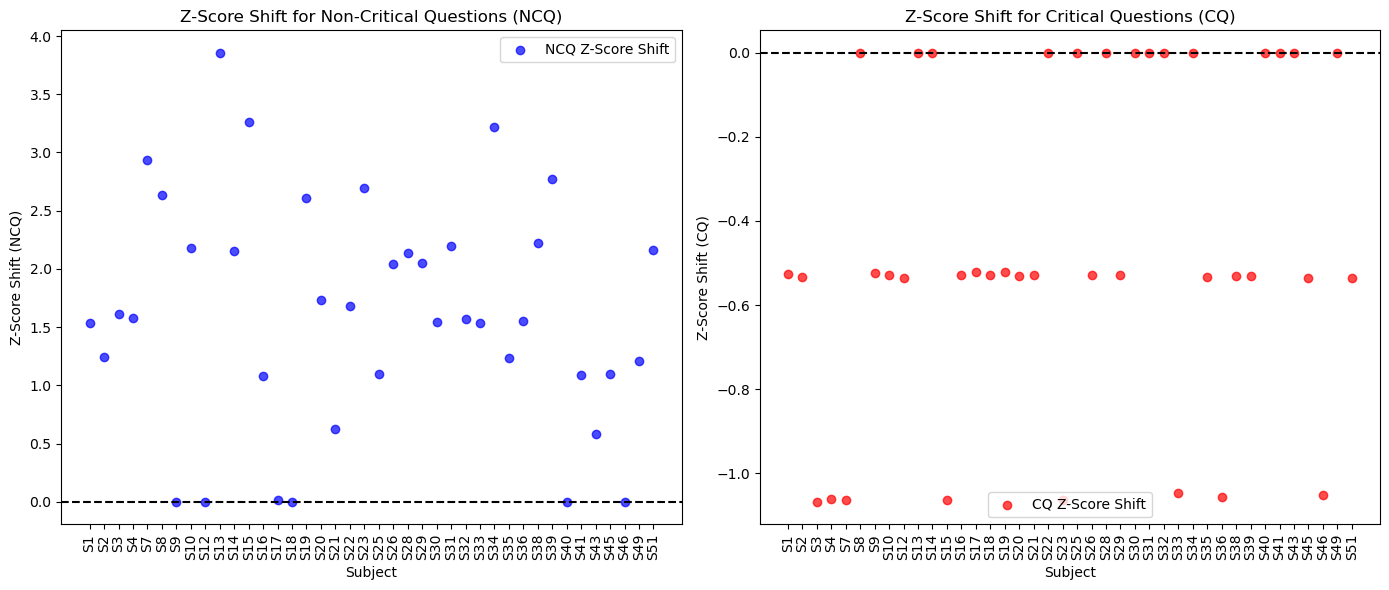

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')


# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Question values (weights for each question)
question_values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Define Critical and Non-Critical Questions
ncq_indices = [0, 1, 3, 4, 5, 7]  # Indices for Non-Critical Questions (Q1, Q2, Q4, Q5, Q6, Q8)
cq_indices = [2, 6]  # Indices for Critical Questions (Q3, Q7)

# Step 2: Monte Carlo Simulation for Each Student

n_simulations = 10000
results = []

for index, row in data.iterrows():
    subject_id = row['SUBJECT']
    
    # Extract probabilities for the simulation
    probs = row[['Q1_prob', 'Q2_prob', 'Q3_prob', 'Q4_prob', 'Q5_prob', 'Q6_prob', 'Q7_prob', 'Q8_prob']].values.astype(float)
    obs_pm = row[['Q1_pm', 'Q2_pm', 'Q3_pm', 'Q4_pm', 'Q5_pm', 'Q6_pm', 'Q7_pm', 'Q8_pm']].values.astype(int)
    obs_fm = row[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']].values.astype(int)

    # Calculate observed total performance scores for PM
    observed_total_pm = np.dot(obs_pm, question_values)

    # Simulate scores once for PM
    sim_totals = []
    for _ in range(n_simulations):
        # Simulate responses using the probabilities
        sim_responses = np.random.binomial(1, probs)
        sim_total = np.dot(sim_responses, question_values)
        sim_totals.append(sim_total)

    # Convert simulation results to a numpy array
    sim_totals = np.array(sim_totals)

    # Calculate the expected value and 99% confidence interval (instead of 95%)
    expected_value = np.mean(sim_totals)
    lower_bound = np.percentile(sim_totals, 0.5)
    upper_bound = np.percentile(sim_totals, 99.5)

    # Calculate the z-score and p-value for PM
    std_dev = np.std(sim_totals)
    z_score_pm = (observed_total_pm - expected_value) / std_dev
    p_value_pm = np.mean(sim_totals >= observed_total_pm)

    # NCQ: FM answers (correct direction) - use only NCQ indices for FM, copy PM for CQ
    obs_fm_ncq = obs_fm.copy()
    obs_fm_ncq[cq_indices] = obs_pm[cq_indices]  # Copy PM values for CQ questions
    observed_total_fm_ncq = np.dot(obs_fm_ncq, question_values)
    
    # Calculate z-score and p-value for FM (NCQ)
    z_score_fm_ncq = (observed_total_fm_ncq - expected_value) / std_dev
    p_value_fm_ncq = np.mean(sim_totals >= observed_total_fm_ncq)

    # CQ: FM answers (wrong direction) - use only CQ indices for FM, copy PM for NCQ
    obs_fm_cq = obs_fm.copy()
    obs_fm_cq[ncq_indices] = obs_pm[ncq_indices]  # Copy PM values for NCQ questions
    observed_total_fm_cq = np.dot(obs_fm_cq, question_values)
    
    # Calculate z-score and p-value for FM (CQ)
    z_score_fm_cq = (observed_total_fm_cq - expected_value) / std_dev
    p_value_fm_cq = np.mean(sim_totals >= observed_total_fm_cq)

    # Calculate z-score shifts
    delta_z_ncq = z_score_fm_ncq - z_score_pm
    delta_z_cq = z_score_fm_cq - z_score_pm

    # Percentage change in z-scores
    percentage_change_ncq = (delta_z_ncq / abs(z_score_pm)) * 100 if z_score_pm != 0 else 0
    percentage_change_cq = (delta_z_cq / abs(z_score_pm)) * 100 if z_score_pm != 0 else 0

    # Store results
    results.append({
        'SUBJECT': subject_id,
        'Observed_Total_PM': observed_total_pm,
        'Expected': expected_value,
        '99% CI Lower': lower_bound,
        '99% CI Upper': upper_bound,
        'Z_Score_PM': z_score_pm,
        'P_Value_PM': p_value_pm,
        'Observed_Total_FM_NCQ': observed_total_fm_ncq,
        'Z_Score_FM_NCQ': z_score_fm_ncq,
        'P_Value_FM_NCQ': p_value_fm_ncq,
        'Observed_Total_FM_CQ': observed_total_fm_cq,
        'Z_Score_FM_CQ': z_score_fm_cq,
        'P_Value_FM_CQ': p_value_fm_cq,
        'Delta_Z_NCQ': delta_z_ncq,
        'Delta_Z_CQ': delta_z_cq,
        'Percentage_Change_NCQ': percentage_change_ncq,
        'Percentage_Change_CQ': percentage_change_cq
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Display the results
print(results_df.to_string(index=False))

# Visualization of Z-Score Shifts for NCQ and CQ

plt.figure(figsize=(14, 6))

# Plot Z-Score Shift for NCQ
plt.subplot(1, 2, 1)
plt.scatter(results_df['SUBJECT'], results_df['Delta_Z_NCQ'], color='blue', label='NCQ Z-Score Shift', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Subject')
plt.ylabel('Z-Score Shift (NCQ)')
plt.title('Z-Score Shift for Non-Critical Questions (NCQ)')
plt.xticks(rotation=90)
plt.legend()

# Plot Z-Score Shift for CQ
plt.subplot(1, 2, 2)
plt.scatter(results_df['SUBJECT'], results_df['Delta_Z_CQ'], color='red', label='CQ Z-Score Shift', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Subject')
plt.ylabel('Z-Score Shift (CQ)')
plt.title('Z-Score Shift for Critical Questions (CQ)')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


# Approach to Analyzing Critical and Non-Critical Questions Separately:


<Figure size 1800x800 with 0 Axes>

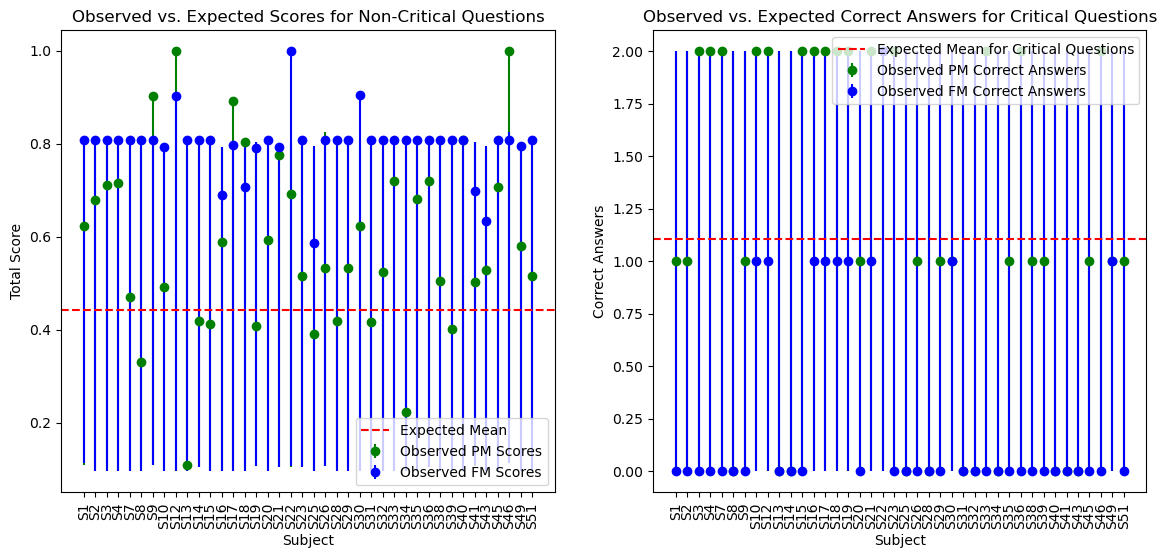

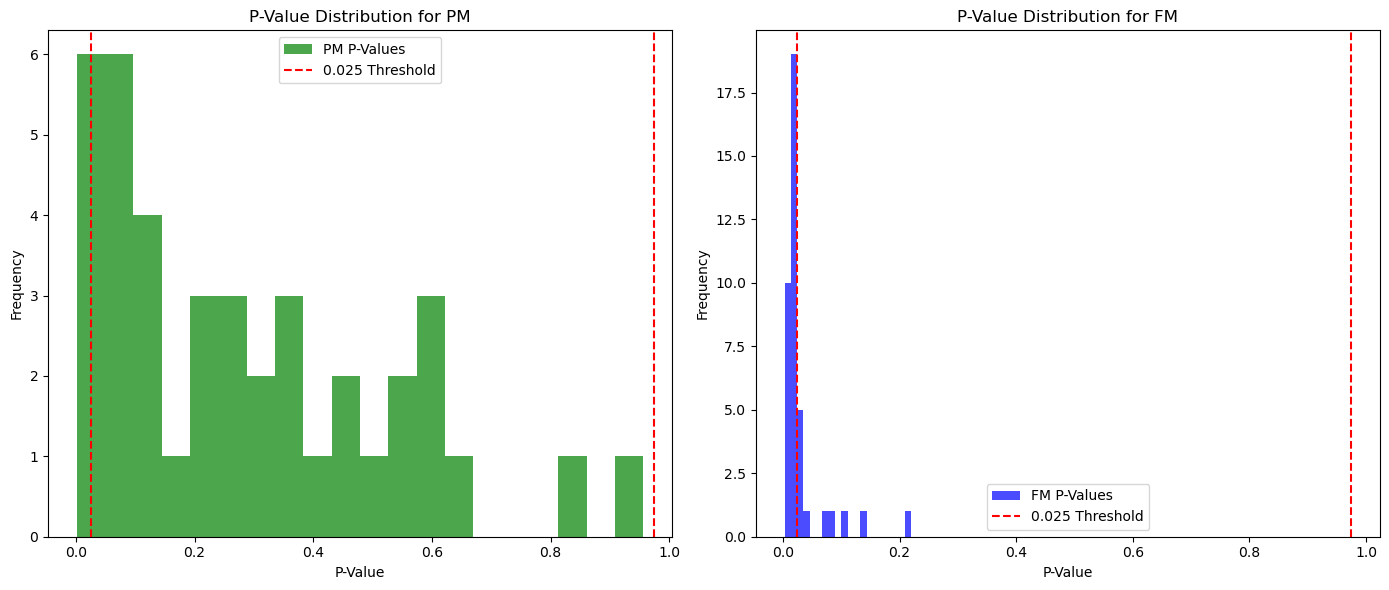

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Question values
question_values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Step 2: Monte Carlo Simulation for Each Student

n_simulations = 10000
results = []

for index, row in data.iterrows():
    subject_id = row['SUBJECT']
    
    # Extract probabilities and observed scores for PM and FM
    probs = row[['Q1_prob', 'Q2_prob', 'Q3_prob', 'Q4_prob', 'Q5_prob', 'Q6_prob', 'Q7_prob', 'Q8_prob']].values.astype(float)
    obs_pm = row[['Q1_pm', 'Q2_pm', 'Q3_pm', 'Q4_pm', 'Q5_pm', 'Q6_pm', 'Q7_pm', 'Q8_pm']].values.astype(int)
    obs_fm = row[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']].values.astype(int)

    # Calculate observed total performance scores for PM and FM
    observed_total_pm = np.dot(obs_pm, question_values)
    observed_total_fm = np.dot(obs_fm, question_values)

    # Separate out the critical questions (Q3 and Q7)
    critical_indices = [2, 6]  # Q3 and Q7
    non_critical_indices = [i for i in range(8) if i not in critical_indices]

    # Observed correct answers for critical questions
    observed_correct_pm_critical = sum(obs_pm[critical_indices])
    observed_correct_fm_critical = sum(obs_fm[critical_indices])

    # Observed total scores for non-critical questions
    observed_total_pm_non_critical = sum(obs_pm[non_critical_indices] * question_values[non_critical_indices])
    observed_total_fm_non_critical = sum(obs_fm[non_critical_indices] * question_values[non_critical_indices])

    # Simulate scores for PM and FM
    sim_totals_pm = []
    sim_totals_fm = []
    sim_correct_critical_pm = []
    sim_correct_critical_fm = []

    for _ in range(n_simulations):
        # Simulate preliminary responses
        sim_responses_pm = np.random.binomial(1, probs)
        sim_total_pm = np.dot(sim_responses_pm, question_values)
        sim_totals_pm.append(sim_total_pm)

        # For critical questions
        sim_correct_pm_critical = sum(sim_responses_pm[critical_indices])
        sim_correct_critical_pm.append(sim_correct_pm_critical)

        # Simulate final responses
        sim_responses_fm = np.random.binomial(1, probs)
        sim_total_fm = np.dot(sim_responses_fm, question_values)
        sim_totals_fm.append(sim_total_fm)

        # For critical questions
        sim_correct_fm_critical = sum(sim_responses_fm[critical_indices])
        sim_correct_critical_fm.append(sim_correct_fm_critical)

    # Convert simulation results to numpy arrays
    sim_totals_pm = np.array(sim_totals_pm)
    sim_totals_fm = np.array(sim_totals_fm)
    sim_correct_critical_pm = np.array(sim_correct_critical_pm)
    sim_correct_critical_fm = np.array(sim_correct_critical_fm)

    # Calculate p-values
    p_value_pm = np.mean(sim_totals_pm >= observed_total_pm)
    p_value_fm = np.mean(sim_totals_fm >= observed_total_fm)

    p_value_pm_critical = np.mean(sim_correct_critical_pm >= observed_correct_pm_critical)
    p_value_fm_critical = np.mean(sim_correct_critical_fm >= observed_correct_fm_critical)

    # Determine if the observed results are plausible (95% confidence level)
    plausible_pm = 1 if p_value_pm >= 0.025 and p_value_pm <= 0.975 else 0
    plausible_fm = 1 if p_value_fm >= 0.025 and p_value_fm <= 0.975 else 0
    plausible_pm_critical = 1 if p_value_pm_critical >= 0.025 and p_value_pm_critical <= 0.975 else 0
    plausible_fm_critical = 1 if p_value_fm_critical >= 0.025 and p_value_fm_critical <= 0.975 else 0

    # Calculate confidence intervals
    ci_lower_pm = np.percentile(sim_totals_pm, 2.5)
    ci_upper_pm = np.percentile(sim_totals_pm, 97.5)
    ci_lower_fm = np.percentile(sim_totals_fm, 2.5)
    ci_upper_fm = np.percentile(sim_totals_fm, 97.5)
    
    ci_lower_critical = np.percentile(sim_correct_critical_pm, 2.5)
    ci_upper_critical = np.percentile(sim_correct_critical_pm, 97.5)

    # Expected values
    expected_pm = np.mean(sim_totals_pm)
    expected_fm = np.mean(sim_totals_fm)
    expected_correct_critical = np.mean(sim_correct_critical_pm)

    # Store results
    results.append({
        'SUBJECT': subject_id,
        'Observed_Total_PM': observed_total_pm,
        'Expected_PM': expected_pm,
        '95%_CI_Lower_PM': ci_lower_pm,
        '95%_CI_Upper_PM': ci_upper_pm,
        'Plausible_PM': plausible_pm,
        'P_Value_PM': p_value_pm,
        'Observed_Total_FM': observed_total_fm,
        'Expected_FM': expected_fm,
        '95%_CI_Lower_FM': ci_lower_fm,
        '95%_CI_Upper_FM': ci_upper_fm,
        'Plausible_FM': plausible_fm,
        'P_Value_FM': p_value_fm,
        'Observed_Correct_PM_Critical': observed_correct_pm_critical,
        'Expected_Correct_Critical': expected_correct_critical,
        '95% CI Lower_Critical': ci_lower_critical,
        '95% CI Upper_Critical': ci_upper_critical,
        'Plausible_PM_Critical': plausible_pm_critical,
        'P_Value_PM_Critical': p_value_pm_critical,
        'Observed_Correct_FM_Critical': observed_correct_fm_critical,
        'Plausible_FM_Critical': plausible_fm_critical,
        'P_Value_FM_Critical': p_value_fm_critical
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting functions
def plot_non_critical_questions(results_df):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)

    # Calculate non-negative yerr values
    yerr_pm = [
        np.maximum(0, results_df['Observed_Total_PM'] - results_df['95%_CI_Lower_PM']),
        np.maximum(0, results_df['95%_CI_Upper_PM'] - results_df['Observed_Total_PM'])
    ]
    yerr_fm = [
        np.maximum(0, results_df['Observed_Total_FM'] - results_df['95%_CI_Lower_FM']),
        np.maximum(0, results_df['95%_CI_Upper_FM'] - results_df['Observed_Total_FM'])
    ]

    plt.errorbar(results_df['SUBJECT'], results_df['Observed_Total_PM'], 
                 yerr=yerr_pm, fmt='o', label='Observed PM Scores', color='green')
    plt.errorbar(results_df['SUBJECT'], results_df['Observed_Total_FM'], 
                 yerr=yerr_fm, fmt='o', label='Observed FM Scores', color='blue')
    plt.axhline(y=results_df['Expected_PM'].mean(), color='red', linestyle='--', label='Expected Mean')
    plt.xticks(rotation=90)
    plt.xlabel('Subject')
    plt.ylabel('Total Score')
    plt.title('Observed vs. Expected Scores for Non-Critical Questions')
    plt.legend()

def plot_critical_questions(results_df):
    plt.subplot(1, 2, 2)

    # Calculate non-negative yerr values for critical questions
    yerr_pm_critical = [
        np.maximum(0, results_df['Observed_Correct_PM_Critical'] - results_df['95% CI Lower_Critical']),
        np.maximum(0, results_df['95% CI Upper_Critical'] - results_df['Observed_Correct_PM_Critical'])
    ]
    yerr_fm_critical = [
        np.maximum(0, results_df['Observed_Correct_FM_Critical'] - results_df['95% CI Lower_Critical']),
        np.maximum(0, results_df['95% CI Upper_Critical'] - results_df['Observed_Correct_FM_Critical'])
    ]

    plt.errorbar(results_df['SUBJECT'], results_df['Observed_Correct_PM_Critical'],
                 yerr=yerr_pm_critical, fmt='o', label='Observed PM Correct Answers', color='green')
    plt.errorbar(results_df['SUBJECT'], results_df['Observed_Correct_FM_Critical'],
                 yerr=yerr_fm_critical, fmt='o', label='Observed FM Correct Answers', color='blue')
    plt.axhline(y=results_df['Expected_Correct_Critical'].mean(), color='red', linestyle='--', label='Expected Mean for Critical Questions')
    plt.xticks(rotation=90)
    plt.xlabel('Subject')
    plt.ylabel('Correct Answers')
    plt.title('Observed vs. Expected Correct Answers for Critical Questions')
    plt.legend()

def plot_p_value_distributions(results_df):
    plt.figure(figsize=(14, 6))
    
    # Plot for PM P-Values
    plt.subplot(1, 2, 1)
    plt.hist(results_df['P_Value_PM'], bins=20, color='green', alpha=0.7, label='PM P-Values')
    plt.axvline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.axvline(0.975, color='red', linestyle='--')
    plt.xlabel('P-Value')
    plt.ylabel('Frequency')
    plt.title('P-Value Distribution for PM')
    plt.legend()
    
    # Plot for FM P-Values
    plt.subplot(1, 2, 2)
    plt.hist(results_df['P_Value_FM'], bins=20, color='blue', alpha=0.7, label='FM P-Values')
    plt.axvline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.axvline(0.975, color='red', linestyle='--')
    plt.xlabel('P-Value')
    plt.ylabel('Frequency')
    plt.title('P-Value Distribution for FM')
    plt.legend()

def visualize_results():
    plt.figure(figsize=(18, 8))
    
    # Plot for Non-Critical Questions
    plot_non_critical_questions(results_df)

    # Plot for Critical Questions
    plot_critical_questions(results_df)

    # Plot for P-Value Distributions
    plot_p_value_distributions(results_df)

    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_results()


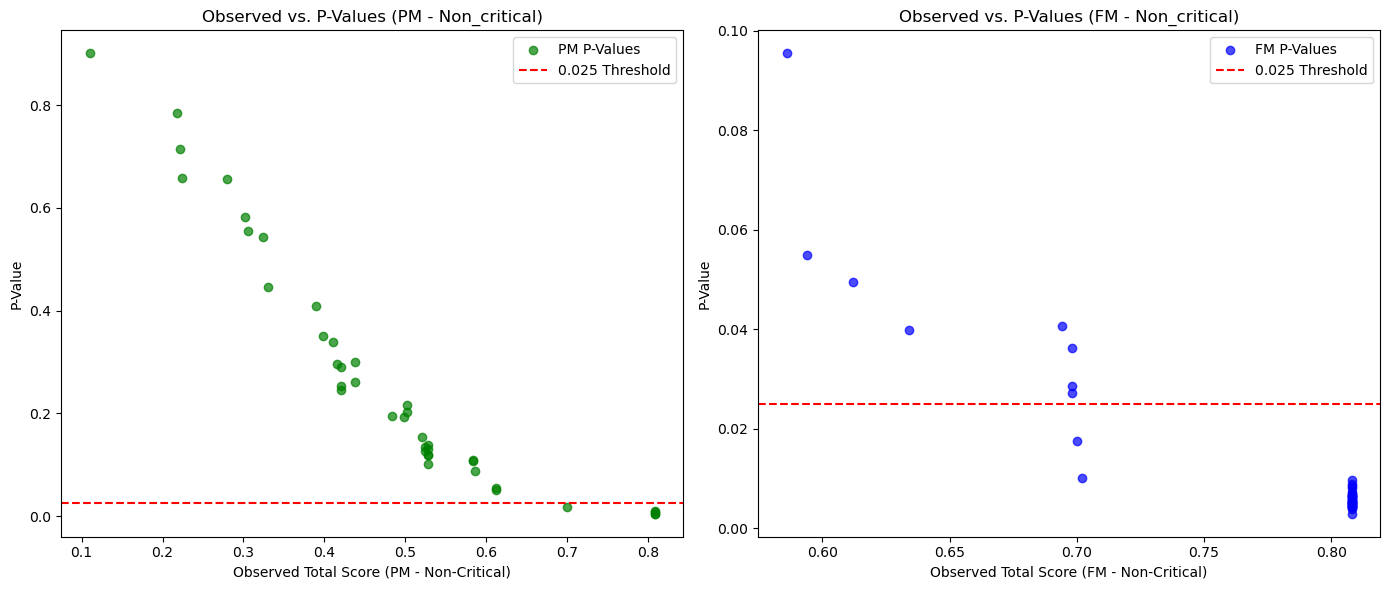

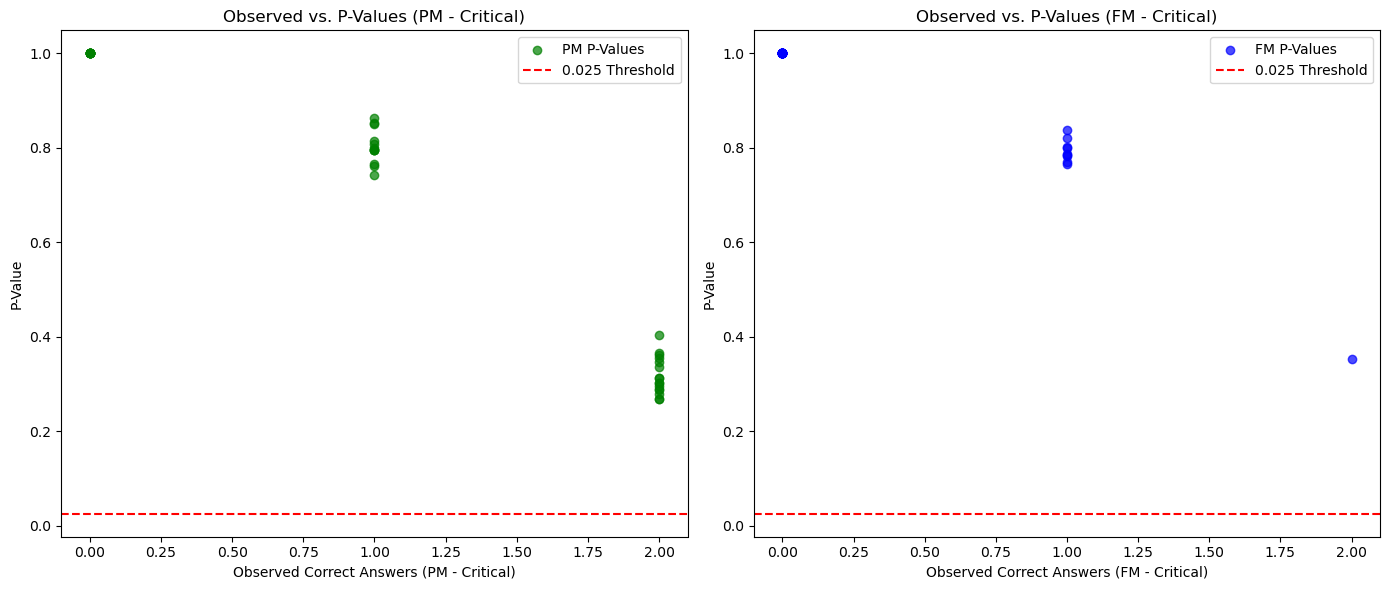

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the Data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Define question values and critical questions
question_values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])
critical_indices = [2, 6]  # Q3 and Q7 (0-based indexing)
non_critical_indices = [i for i in range(8) if i not in critical_indices]


n_simulations = 10000
results = []

for index, row in data.iterrows():
    subject_id = row['SUBJECT']
    
    # Extract probabilities and observed scores for PM and FM
    probs = row[['Q1_prob', 'Q2_prob', 'Q3_prob', 'Q4_prob', 'Q5_prob', 'Q6_prob', 'Q7_prob', 'Q8_prob']].values.astype(float)
    obs_pm = row[['Q1_pm', 'Q2_pm', 'Q3_pm', 'Q4_pm', 'Q5_pm', 'Q6_pm', 'Q7_pm', 'Q8_pm']].values.astype(int)
    obs_fm = row[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']].values.astype(int)

    # Calculate observed total scores for critical and non-critical questions
    observed_correct_pm_critical = sum(obs_pm[critical_indices])
    observed_correct_fm_critical = sum(obs_fm[critical_indices])
    observed_total_pm_non_critical = np.dot(obs_pm[non_critical_indices], question_values[non_critical_indices])
    observed_total_fm_non_critical = np.dot(obs_fm[non_critical_indices], question_values[non_critical_indices])

    # Simulate scores for PM and FM
    sim_correct_critical_pm = []
    sim_correct_critical_fm = []
    sim_totals_pm_non_critical = []
    sim_totals_fm_non_critical = []

    for _ in range(n_simulations):
        # Simulate preliminary responses
        sim_responses_pm = np.random.binomial(1, probs)
        sim_correct_pm_critical = sum(sim_responses_pm[critical_indices])
        sim_correct_critical_pm.append(sim_correct_pm_critical)
        sim_total_pm_non_critical = np.dot(sim_responses_pm[non_critical_indices], question_values[non_critical_indices])
        sim_totals_pm_non_critical.append(sim_total_pm_non_critical)

        # Simulate final responses
        sim_responses_fm = np.random.binomial(1, probs)
        sim_correct_fm_critical = sum(sim_responses_fm[critical_indices])
        sim_correct_critical_fm.append(sim_correct_fm_critical)
        sim_total_fm_non_critical = np.dot(sim_responses_fm[non_critical_indices], question_values[non_critical_indices])
        sim_totals_fm_non_critical.append(sim_total_fm_non_critical)

    # Convert simulation results to numpy arrays
    sim_correct_critical_pm = np.array(sim_correct_critical_pm)
    sim_correct_critical_fm = np.array(sim_correct_critical_fm)
    sim_totals_pm_non_critical = np.array(sim_totals_pm_non_critical)
    sim_totals_fm_non_critical = np.array(sim_totals_fm_non_critical)

    # Calculate p-values
    p_value_pm_critical = np.mean(sim_correct_critical_pm >= observed_correct_pm_critical)
    p_value_fm_critical = np.mean(sim_correct_critical_fm >= observed_correct_fm_critical)
    p_value_pm_non_critical = np.mean(sim_totals_pm_non_critical >= observed_total_pm_non_critical)
    p_value_fm_non_critical = np.mean(sim_totals_fm_non_critical >= observed_total_fm_non_critical)

    # Determine if the observed results are plausible (95% confidence level)
    plausible_pm_critical = 1 if p_value_pm_critical >= 0.025 and p_value_pm_critical <= 0.975 else 0
    plausible_fm_critical = 1 if p_value_fm_critical >= 0.025 and p_value_fm_critical <= 0.975 else 0
    plausible_pm_non_critical = 1 if p_value_pm_non_critical >= 0.025 and p_value_pm_non_critical <= 0.975 else 0
    plausible_fm_non_critical = 1 if p_value_fm_non_critical >= 0.025 and p_value_fm_non_critical <= 0.975 else 0

    # Store results
    results.append({
        'SUBJECT': subject_id,
        'Observed_Correct_PM_Critical': observed_correct_pm_critical,
        'P_Value_PM_Critical': p_value_pm_critical,
        'Plausible_PM_Critical': plausible_pm_critical,
        'Observed_Correct_FM_Critical': observed_correct_fm_critical,
        'P_Value_FM_Critical': p_value_fm_critical,
        'Plausible_FM_Critical': plausible_fm_critical,
        'Observed_Total_PM_Non_Critical': observed_total_pm_non_critical,
        'P_Value_PM_Non_Critical': p_value_pm_non_critical,
        'Plausible_PM_Non_Critical': plausible_pm_non_critical,
        'Observed_Total_FM_Non_Critical': observed_total_fm_non_critical,
        'P_Value_FM_Non_Critical': p_value_fm_non_critical,
        'Plausible_FM_Non_Critical': plausible_fm_non_critical
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)


def plot_pvalues(results_df, question_type):
    plt.figure(figsize=(14, 6))
    
    # Plot for PM P-Values
    plt.subplot(1, 2, 1)
    if question_type == 'non_critical':
        plt.scatter(results_df['Observed_Total_PM_Non_Critical'], results_df['P_Value_PM_Non_Critical'], 
                    color='green', label='PM P-Values', alpha=0.7)
        plt.xlabel('Observed Total Score (PM - Non-Critical)')
    else:
        plt.scatter(results_df['Observed_Correct_PM_Critical'], results_df['P_Value_PM_Critical'], 
                    color='green', label='PM P-Values', alpha=0.7)
        plt.xlabel('Observed Correct Answers (PM - Critical)')

    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.ylabel('P-Value')
    plt.title(f'Observed vs. P-Values (PM - {question_type.capitalize()})')
    plt.legend()

    # Plot for FM P-Values
    plt.subplot(1, 2, 2)
    if question_type == 'non_critical':
        plt.scatter(results_df['Observed_Total_FM_Non_Critical'], results_df['P_Value_FM_Non_Critical'], 
                    color='blue', label='FM P-Values', alpha=0.7)
        plt.xlabel('Observed Total Score (FM - Non-Critical)')
    else:
        plt.scatter(results_df['Observed_Correct_FM_Critical'], results_df['P_Value_FM_Critical'], 
                    color='blue', label='FM P-Values', alpha=0.7)
        plt.xlabel('Observed Correct Answers (FM - Critical)')

    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.ylabel('P-Value')
    plt.title(f'Observed vs. P-Values (FM - {question_type.capitalize()})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def visualize_critical_non_critical_results():
    # Plot for Non-Critical Questions
    plot_pvalues(results_df, 'non_critical')

    # Plot for Critical Questions
    plot_pvalues(results_df, 'critical')

# Call the visualization function
visualize_critical_non_critical_results()




KeyError: 'Observed_Total_PM_Non_Critical'

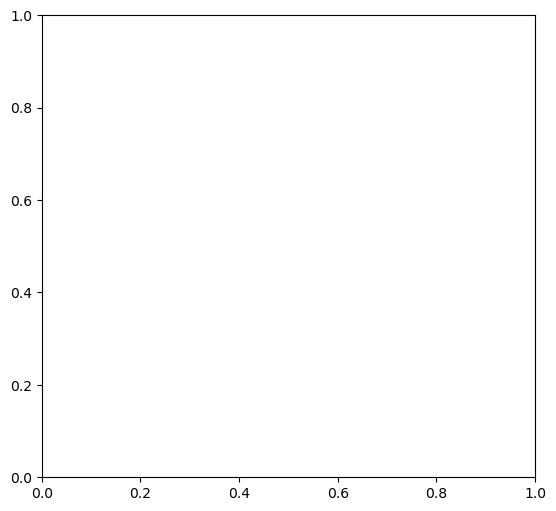

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for Non-Critical Questions
def plot_non_critical_pvalues(results_df):
    plt.figure(figsize=(14, 6))
    
    # Plot for PM P-Values of Non-Critical Questions
    plt.subplot(1, 2, 1)
    plt.scatter(results_df['Observed_Total_PM_Non_Critical'], results_df['P_Value_PM_Non_Critical'], 
                color='green', label='PM P-Values', alpha=0.7)
    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.xlabel('Observed Total Score (PM - Non-Critical)')
    plt.ylabel('P-Value')
    plt.title('Observed Total Scores vs. P-Values (PM - Non-Critical)')
    plt.legend()
    
    # Plot for FM P-Values of Non-Critical Questions
    plt.subplot(1, 2, 2)
    plt.scatter(results_df['Observed_Total_FM_Non_Critical'], results_df['P_Value_FM_Non_Critical'], 
                color='blue', label='FM P-Values', alpha=0.7)
    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.xlabel('Observed Total Score (FM - Non-Critical)')
    plt.ylabel('P-Value')
    plt.title('Observed Total Scores vs. P-Values (FM - Non-Critical)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for Critical Questions
def plot_critical_pvalues(results_df):
    plt.figure(figsize=(14, 6))
    
    # Plot for PM P-Values of Critical Questions
    plt.subplot(1, 2, 1)
    plt.scatter(results_df['Observed_Correct_PM_Critical'], results_df['P_Value_PM_Critical'], 
                color='green', label='PM P-Values', alpha=0.7)
    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.xlabel('Observed Correct Answers (PM - Critical)')
    plt.ylabel('P-Value')
    plt.title('Observed Correct Answers vs. P-Values (PM - Critical)')
    plt.legend()
    
    # Plot for FM P-Values of Critical Questions
    plt.subplot(1, 2, 2)
    plt.scatter(results_df['Observed_Correct_FM_Critical'], results_df['P_Value_FM_Critical'], 
                color='blue', label='FM P-Values', alpha=0.7)
    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.xlabel('Observed Correct Answers (FM - Critical)')
    plt.ylabel('P-Value')
    plt.title('Observed Correct Answers vs. P-Values (FM - Critical)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
def visualize_critical_non_critical_results():
    # Plot for Non-Critical Questions
    plot_non_critical_pvalues(results_df)
    
    # Plot for Critical Questions
    plot_critical_pvalues(results_df)
    
# Call the visualization function
visualize_critical_non_critical_results()


# _____________________________________________________
 
# Complementary analyses 
## _____________________________________________________


# Plausibility of Results  (Separately)

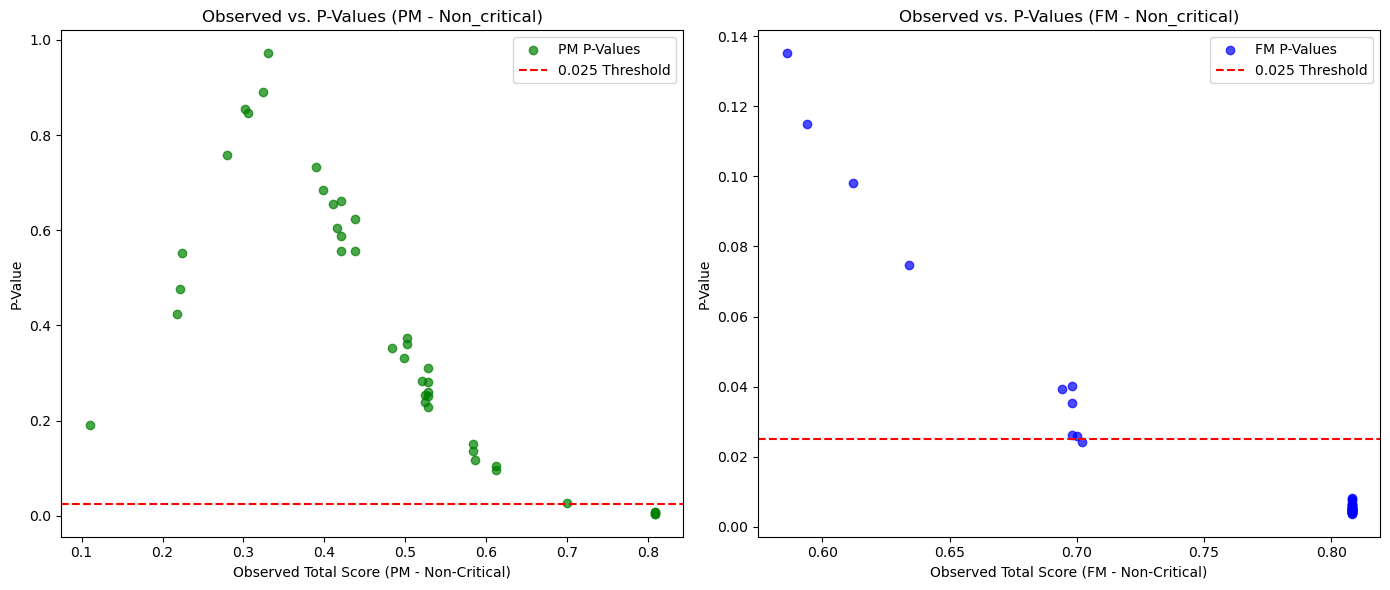

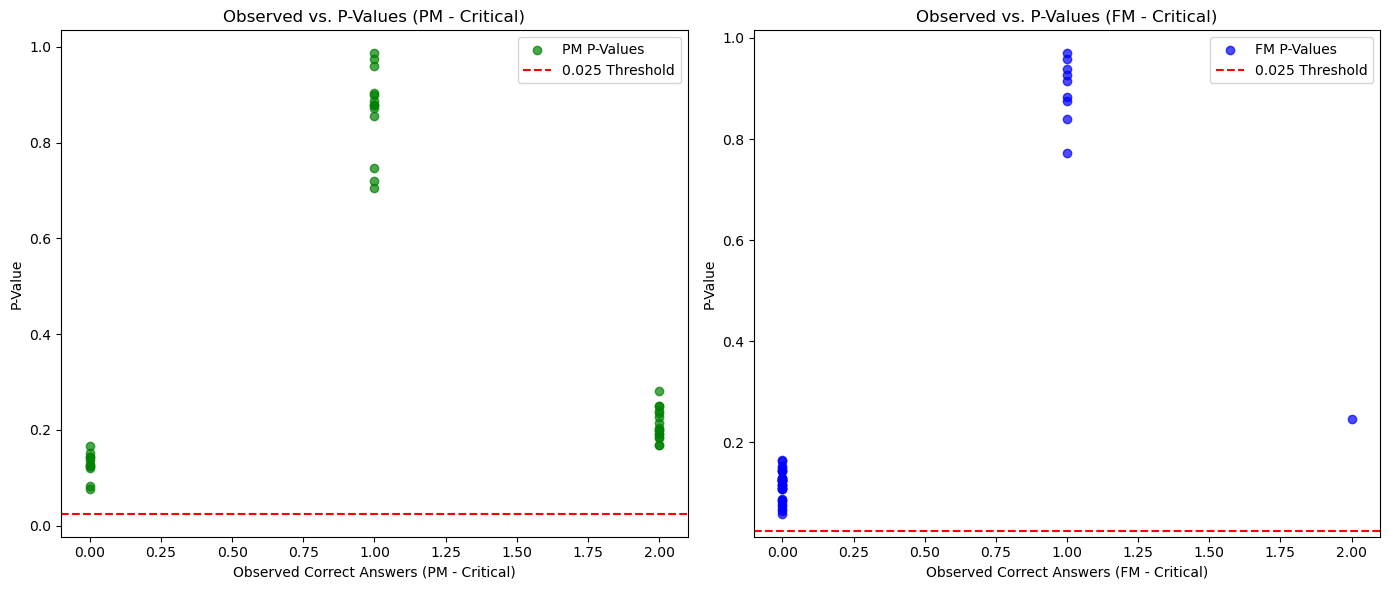

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Read the Data
prob_df = pd.read_csv('PreliminaryProbabilities_8q.csv')
pm_df = pd.read_csv('PreliminaryResults_8q.csv')
fm_df = pd.read_csv('FinalResults_8q.csv')

# Rename the columns in the probability dataframe
prob_df.columns = ['SUBJECT', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']

# Ensure that the subject identifiers are consistent across dataframes
prob_df['SUBJECT'] = prob_df['SUBJECT'].str.strip()
pm_df['SUBJECT'] = pm_df['SUBJECT'].str.strip()
fm_df['SUBJECT'] = fm_df['SUBJECT'].str.strip()

# Merge the dataframes to align the data
data = prob_df.merge(pm_df, on='SUBJECT', suffixes=('_prob', '_pm'))
data = data.merge(fm_df, on='SUBJECT', suffixes=('', '_fm'))

# Step 2: Define the Monte Carlo Simulation for Each Student
n_simulations = 10000
results = []

# Indices of critical and non-critical questions
critical_indices = [2, 6]  # Q3 and Q7
non_critical_indices = [i for i in range(8) if i not in critical_indices]
question_values = np.array([0.110, 0.106, 0.095, 0.174, 0.114, 0.108, 0.096, 0.196])

# Simulate results for each student
for index, row in data.iterrows():
    subject_id = row['SUBJECT']
    probs = row[['Q1_prob', 'Q2_prob', 'Q3_prob', 'Q4_prob', 'Q5_prob', 'Q6_prob', 'Q7_prob', 'Q8_prob']].values.astype(float)
    obs_pm = row[['Q1_pm', 'Q2_pm', 'Q3_pm', 'Q4_pm', 'Q5_pm', 'Q6_pm', 'Q7_pm', 'Q8_pm']].values.astype(int)
    obs_fm = row[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']].values.astype(int)

    # Observed correct answers for critical and non-critical questions
    observed_correct_pm_critical = sum(obs_pm[critical_indices])
    observed_correct_fm_critical = sum(obs_fm[critical_indices])
    observed_total_pm_non_critical = sum(obs_pm[non_critical_indices] * question_values[non_critical_indices])
    observed_total_fm_non_critical = sum(obs_fm[non_critical_indices] * question_values[non_critical_indices])

    # Simulate scores
    sim_totals_pm, sim_totals_fm, sim_correct_critical_pm, sim_correct_critical_fm = [], [], [], []

    for _ in range(n_simulations):
        sim_responses_pm = np.random.binomial(1, probs)
        sim_responses_fm = np.random.binomial(1, probs)
        sim_totals_pm.append(np.dot(sim_responses_pm[non_critical_indices], question_values[non_critical_indices]))
        sim_totals_fm.append(np.dot(sim_responses_fm[non_critical_indices], question_values[non_critical_indices]))
        sim_correct_critical_pm.append(sum(sim_responses_pm[critical_indices]))
        sim_correct_critical_fm.append(sum(sim_responses_fm[critical_indices]))

    # Convert to numpy arrays
    sim_totals_pm = np.array(sim_totals_pm)
    sim_totals_fm = np.array(sim_totals_fm)
    sim_correct_critical_pm = np.array(sim_correct_critical_pm)
    sim_correct_critical_fm = np.array(sim_correct_critical_fm)

    # Calculate mean and standard deviation for normal approximation
    mean_pm_non_critical = np.mean(sim_totals_pm)
    std_pm_non_critical = np.std(sim_totals_pm)
    mean_fm_non_critical = np.mean(sim_totals_fm)
    std_fm_non_critical = np.std(sim_totals_fm)

    mean_pm_critical = np.mean(sim_correct_critical_pm)
    std_pm_critical = np.std(sim_correct_critical_pm)
    mean_fm_critical = np.mean(sim_correct_critical_fm)
    std_fm_critical = np.std(sim_correct_critical_fm)

    # Calculate z-scores for the observed values
    z_score_pm_non_critical = (observed_total_pm_non_critical - mean_pm_non_critical) / std_pm_non_critical
    z_score_fm_non_critical = (observed_total_fm_non_critical - mean_fm_non_critical) / std_fm_non_critical

    z_score_pm_critical = (observed_correct_pm_critical - mean_pm_critical) / std_pm_critical
    z_score_fm_critical = (observed_correct_fm_critical - mean_fm_critical) / std_fm_critical

    # Calculate p-values from z-scores
    p_value_pm_non_critical = 2 * (1 - norm.cdf(abs(z_score_pm_non_critical)))
    p_value_fm_non_critical = 2 * (1 - norm.cdf(abs(z_score_fm_non_critical)))

    p_value_pm_critical = 2 * (1 - norm.cdf(abs(z_score_pm_critical)))
    p_value_fm_critical = 2 * (1 - norm.cdf(abs(z_score_fm_critical)))

    # Store results
    results.append({
        'SUBJECT': subject_id,
        'Observed_Total_PM_Non_Critical': observed_total_pm_non_critical,
        'Observed_Total_FM_Non_Critical': observed_total_fm_non_critical,
        'Z_Score_PM_Non_Critical': z_score_pm_non_critical,
        'Z_Score_FM_Non_Critical': z_score_fm_non_critical,
        'P_Value_PM_Non_Critical': p_value_pm_non_critical,
        'P_Value_FM_Non_Critical': p_value_fm_non_critical,
        'Observed_Correct_PM_Critical': observed_correct_pm_critical,
        'Observed_Correct_FM_Critical': observed_correct_fm_critical,
        'Z_Score_PM_Critical': z_score_pm_critical,
        'Z_Score_FM_Critical': z_score_fm_critical,
        'P_Value_PM_Critical': p_value_pm_critical,
        'P_Value_FM_Critical': p_value_fm_critical
    })

results_df = pd.DataFrame(results)

# Step 4: Visualize the Results
def plot_p_values(results_df, question_type):
    plt.figure(figsize=(14, 6))

    # Plot for PM P-Values
    plt.subplot(1, 2, 1)
    if question_type == 'non_critical':
        plt.scatter(results_df['Observed_Total_PM_Non_Critical'], results_df['P_Value_PM_Non_Critical'], 
                    color='green', label='PM P-Values', alpha=0.7)
        plt.xlabel('Observed Total Score (PM - Non-Critical)')
    else:
        plt.scatter(results_df['Observed_Correct_PM_Critical'], results_df['P_Value_PM_Critical'], 
                    color='green', label='PM P-Values', alpha=0.7)
        plt.xlabel('Observed Correct Answers (PM - Critical)')

    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.ylabel('P-Value')
    plt.title(f'Observed vs. P-Values (PM - {question_type.capitalize()})')
    plt.legend()

    # Plot for FM P-Values
    plt.subplot(1, 2, 2)
    if question_type == 'non_critical':
        plt.scatter(results_df['Observed_Total_FM_Non_Critical'], results_df['P_Value_FM_Non_Critical'], 
                    color='blue', label='FM P-Values', alpha=0.7)
        plt.xlabel('Observed Total Score (FM - Non-Critical)')
    else:
        plt.scatter(results_df['Observed_Correct_FM_Critical'], results_df['P_Value_FM_Critical'], 
                    color='blue', label='FM P-Values', alpha=0.7)
        plt.xlabel('Observed Correct Answers (FM - Critical)')

    plt.axhline(0.025, color='red', linestyle='--', label='0.025 Threshold')
    plt.ylabel('P-Value')
    plt.title(f'Observed vs. P-Values (FM - {question_type.capitalize()})')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Step 5: Visualize Results for Both Non-Critical and Critical Questions
def visualize_results():
    # Plot for Non-Critical Questions
    plot_p_values(results_df, 'non_critical')

    # Plot for Critical Questions
    plot_p_values(results_df, 'critical')

# Call the visualization function
visualize_results()
